In [1]:
import starepandas
import geopandas
import pandas
import datetime
import matplotlib.pyplot as plt

In [2]:
cities = ['Buenos Aires', 'Brasilia', 'Santiago', 
          'Bogota', 'Caracas', 'Sao Paulo', 'Bridgetown']

latitudes = [-34.58, -15.78, -33.45, 4.60, 10.48, -23.55, 13.1]
longitudes = [-58.66, -47.91, -70.66, -74.08, -66.86, -46.63, -59.62]
data =  {'City': cities, 
         'Latitude': latitudes, 'Longitude': longitudes}

cities = starepandas.STAREDataFrame(data)
stare = starepandas.stare_from_xy(cities.Longitude, cities.Latitude, level=27)
geom = geopandas.points_from_xy(cities.Longitude, cities.Latitude, crs='EPSG:4326')
cities.set_stare(stare, inplace=True)
cities.set_geometry(geom, inplace=True)
cities.set_trixels(inplace=True)

In [3]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries = countries.sort_values(by='name')
countries['geom_simple'] = countries.simplify(0.002)
countries.set_geometry('geom_simple', inplace=True)
samerica = countries[countries.continent=='South America']

stare = starepandas.stare_from_gdf(samerica, level=9, force_ccw=True)
samerica = starepandas.STAREDataFrame(samerica, stare=stare)
trixels = samerica.trixels()
samerica.set_trixels(trixels, inplace=True)

# Small Join

In [4]:
geopandas.sjoin(samerica, cities, how='left').head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geom_simple,stare_left,trixels_left,index_right,City,Latitude,Longitude,stare_right,trixels_right
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","[1831909517177126920, 1831927109363171336, 183...",(POLYGON ((-67.84209847159167 -53.768136050714...,0.0,Buenos Aires,-34.58,-58.66,2.663379e+18,POLYGON ((-58.65999966200309 -34.5800001759415...
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...","POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...","[2684145377912815620, 2692026677260713989, 270...",(POLYGON ((-62.76427600784291 -18.886669386799...,NaN,NaN,NaN,NaN,NaN,NaN
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","[2749447572509687812, 2796735368597078020, 286...",(POLYGON ((-53.69933849725345 -4.6308011280983...,1.0,Brasilia,-15.78,-47.91,2.867415e+18,POLYGON ((-47.90999951241486 -15.7799995312697...
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","[2749447572509687812, 2796735368597078020, 286...",(POLYGON ((-53.69933849725345 -4.6308011280983...,5.0,Sao Paulo,-23.55,-46.63,2.803226e+18,POLYGON ((-46.62999963470963 -23.5500000219939...
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...","MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...","[1829024398665842695, 1831839148432949255, 183...",(POLYGON ((-70.49911208115833 -54.876220492643...,2.0,Santiago,-33.45,-70.66,2.723775e+18,POLYGON ((-70.66000060651589 -33.4499996318796...


In [5]:
starepandas.stare_join(samerica, cities, how='left').head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geom_simple,stare_left,trixels_left,key_right,City,Latitude,Longitude,stare_right,trixels_right
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","[1831909517177126920, 1831927109363171336, 183...",(POLYGON ((-67.84209847159167 -53.768136050714...,0.0,Buenos Aires,-34.58,-58.66,2.663379e+18,POLYGON ((-58.65999966200309 -34.5800001759415...
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...","MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...","[1829024398665842695, 1831839148432949255, 183...",(POLYGON ((-70.49911208115833 -54.876220492643...,2.0,Santiago,-33.45,-70.66,2.723775e+18,POLYGON ((-70.66000060651589 -33.4499996318796...
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...","POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...","[1807104534854500361, 1807106733877755913, 180...",(POLYGON ((-58.42519374161117 -51.947634567869...,NaN,NaN,NaN,NaN,NaN,NaN
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...","POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...","[2632353982198054918, 2632499117732921353, 263...",(POLYGON ((-55.17661686795088 -32.247895158077...,NaN,NaN,NaN,NaN,NaN,NaN
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","[2643648165638569993, 2643771310940880905, 264...",(POLYGON ((-53.69933849725345 -4.6308011280983...,1.0,Brasilia,-15.78,-47.91,2.867415e+18,POLYGON ((-47.90999951241486 -15.7799995312697...


# Granule Intersect

In [6]:
fname = 'data/MYD05_L2.A2020060.1635.061.2020061153519.hdf'
modis = starepandas.read_modis_base(fname)
geom = geopandas.points_from_xy(modis.lon, modis.lat, crs='EPSG:4326')
modis.set_geometry(geom, inplace=True)
trixels = modis.trixels()
modis.set_trixels(trixels=trixels, inplace=True)
brazil = samerica[samerica.name=='Brazil']

## STARE

In [7]:
start = datetime.datetime.now()
a = modis.stare_intersects(brazil.stare.iloc[0])
print(datetime.datetime.now() - start)

0:00:00.158801


## Conventional

In [8]:
start = datetime.datetime.now()
#b = modis.intersects(brazil.iloc[0].geometry)
print(datetime.datetime.now() - start)

0:00:00.000173


# Analysis

<AxesSubplot:>

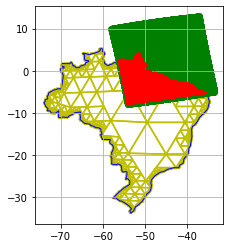

In [20]:
fig, ax = plt.subplots()
ax.grid(True)

brazil.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
brazil.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)
modis[a].plot(ax=ax, color='red', trixels=True)
modis.plot(ax=ax, color='green')

In [23]:
joined = starepandas.stare_join(modis, samerica, how='left')
joined = geopandas.GeoDataFrame(joined).set_geometry('trixels_left')

<AxesSubplot:>

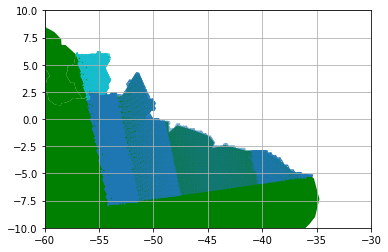

In [27]:
fig, ax = plt.subplots()
ax.grid(True)

ax.set_ylim(-10, 10)
ax.set_xlim(-60, -30)
samerica.plot(ax=ax, color='green')
joined.plot(ax=ax, column='name')